<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
data=pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)

In [29]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [4]:
test_data=pd.DataFrame(data)

test_data=pd.concat([test_data.loc[:, 0], test_data.loc[:, 1:].replace(99.00, np.NaN)], axis=1)

In [5]:
test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,100,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,91,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,39,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,37,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.55,...,-8.83

In [6]:
test_data.drop(columns=[0], inplace=True)

In [7]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [8]:
print('Joke with highest rating : ', test_data.max(axis=0).idxmax())
print('Joke with lowest rating : ', test_data.min(axis=0).idxmax())

Joke with highest rating :  45
Joke with lowest rating :  1


In [9]:
val_data=pd.DataFrame(data)
val_data.drop(columns=[0], inplace=True)

In [10]:
arr = val_data.values
arr.shape

(24983, 100)

In [11]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [12]:
val_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-

In [35]:
data.drop(columns=[0], inplace=True)

In [37]:
data=pd.DataFrame(data.loc[:, 1:].replace(99.00, np.NaN))

In [14]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [15]:
new_arr, idx = replace(arr, 0.1)

In [16]:
arr[idx[0][0], idx[1][0]]

-4.76

In [17]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [54]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [55]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 5) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [56]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations

Iteration 0/100:	MSE=26.174445
Iteration 5/100:	MSE=24.234566
Iteration 10/100:	MSE=23.046154
Iteration 15/100:	MSE=21.930493
Iteration 20/100:	MSE=20.741307
Iteration 25/100:	MSE=19.127936
Iteration 30/100:	MSE=17.909699
Iteration 35/100:	MSE=17.461450
Iteration 40/100:	MSE=17.295395
Iteration 45/100:	MSE=17.219267
Iteration 50/100:	MSE=17.179936
Iteration 55/100:	MSE=17.158505
Iteration 60/100:	MSE=17.146534
Iteration 65/100:	MSE=17.139776
Iteration 70/100:	MSE=17.135960
Iteration 75/100:	MSE=17.133835
Iteration 80/100:	MSE=17.132696
Iteration 85/100:	MSE=17.132136
Iteration 90/100:	MSE=17.131921
Iteration 95/100:	MSE=17.131911


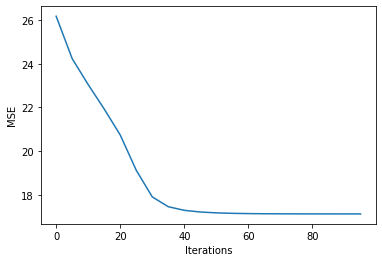

In [58]:
plt.figure()
plt.plot(np.arange(0, num_iter, 5), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [59]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.90717286, -4.16335061, -5.6338342 , ..., -2.46229049,
        -6.22358854, -2.58952914],
       [ 2.98215224,  3.14394861,  3.78434145, ...,  2.51297806,
         3.96271148,  2.75924652],
       [ 6.89042085,  7.18243186,  7.49293504, ...,  7.34347946,
         7.24581377,  8.27432242],
       ...,
       [-1.04110818, -1.10432187, -1.42402755, ..., -0.75092163,
        -1.54050728, -0.8071453 ],
       [-1.89995492, -2.03190809, -2.85242072, ..., -1.05870308,
        -3.19866589, -1.08793997],
       [ 2.78853376,  2.87343456,  2.52365838, ...,  3.59694819,
         2.1555645 ,  4.12079377]])

In [60]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [61]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.907172862871733)","(8.79, -4.16335060976149)","(-9.66, -5.6338342047862975)","(-8.16, -9.543816776992442)","(-7.52, -2.663705110297641)","(-8.5, -1.7732290625485403)","(-9.85, -4.894884431430319)","(4.17, -4.305643190901772)","(-8.98, -8.847383426338236)","(-4.76, -3.7264722780851365)","(-8.5, -1.5924994771530148)","(-6.75, -1.7254903980695273)","(-7.18, -6.482107514637209)","(8.45, -1.5566038162416604)","(-7.18, -6.5367039281959425)","(-7.52, -9.982048168469019)","(-7.43, -4.438215696637347)","(-9.81, -5.2777847986994715)","(-9.85, -3.8068075425027583)","(-9.85, -6.1091565022214365)","(-9.37, 0.4322369565187311)","(1.5, -4.294623188942709)","(-4.37, -6.0884460492343315)","(-9.81, -10.567114211736842)","(-8.5, -4.631966594417374)","(1.12, -1.5548892261377711)","(7.82, 3.4283132857610754)","(2.86, -1.6763346625214905)","(9.13, 3.499571607722197)","(-7.43, -7.929173462190136)","(2.14, 1.1207343957582725)","(-4.08, 3.2381978183886417)","(-9.08, -9.430975178384115)","(7.82, -2.67331188258042)","(5.05, 2.8531207945489094)","(4.95, 3.6759283239390013)","(-9.17, -9.126117200824142)","(-8.4, -3.4591211522758796)","(-8.4, -2.4940166277530205)","(-8.4, -3.6604068722500758)",...,"(8.59, 1.2101852301389788)","(3.59, 2.1100452136637786)","(-6.84, -5.4029774318427055)","(-9.03, -8.320933627565134)","(2.82, 1.355862918396516)","(-1.36, 1.5246570036366014)","(-9.08, -8.800827850764179)","(8.3, 1.7400095380405964)","(5.68, 1.7683425451436692)","(-4.81, -4.659751985940866)","(nan, -6.817618657299565)","(nan, 1.14945382717878)","(nan, -3.3917960956837625)","(nan, -9.223839736049003)","(nan, -6.0642245904823096)","(nan, 0.5280903236295779)","(nan, -4.2468875983404315)","(-9.42, -2.2945347241972764)","(nan, -5.409270680657383)","(nan, -2.722093900029686)","(nan, -1.352197265421327)","(-7.72, -4.6727572922161364)","(nan, -0.38181376900615543)","(nan, -4.852047668131465)","(nan, -4.19194143685954)","(nan, -6.2823931140527725)","(nan, -1.1609674887578936)","(nan, -1.2942878371361235)","(nan, 3.141670680728487)","(nan, -5.353738462678009)","(2.82, -1.536442047191629)","(nan, -3.2377979911012527)","(nan, 0.19812917226238247)","(nan, -4.776150780431463)","(nan, -3.9752418252722594)","(nan, -2.917593111300143)","(-5.63, -2.2144363494480426)","(nan, -2.462290492472083)","(nan, -6.223588544641804)","(nan, -2.589529136786581)"
1,"(4.08, 2.982152241608445)","(-0.29, 3.14394860859999)","(6.36, 3.784341452615187)","(4.37, 5.264127380821131)","(-2.38, 2.205498653697942)","(-9.66, 2.518584624450792)","(-0.73, 2.962092474441327)","(-5.34, 2.321442354734842)","(8.88, 5.071776902765231)","(9.22, 2.992852496628649)","(6.75, 2.3871429511242996)","(8.64, 2.55850096687967)","(4.42, 3.1400269908837846)","(7.43, 2.47766584429213)","(4.56, 3.011191908982941)","(-0.97, 4.306250839014147)","(4.66, 2.4485227455742153)","(-0.68, 2.941565321966391)","(3.3, 2.7164172566161935)","(-1.21, 3.5760235800843048)","(0.87, 1.6196619079450125)","(8.64, 3.4823426058008047)","(8.35, 4.010825849008375)","(9.17, 5.513084625837355)","(0.05, 3.533688428916401)","(7.57, 2.4208125695932465)","(4.71, 0.23744706954289574)","(0.87, 2.3903817739191076)","(-0.39, 0.12030176442026398)","(6.99, 4.866426451040369)","(6.5, 1.249333324901248)","(-0.92, 0.3256117259872251)","(7.14, 5.210544762273625)","(9.03, 2.7618776620549763)","(-1.8, 0.5246756808106869)","(0.73, 0.051389788786230496)","(7.09, 4.850588306467743)","(3.4, 3.0640399520361115)","(-0.87, 2.785053688144321)","(7.91, 3.21425555470793)",...,"(-6.7, 1.3047546580129354)","(-3.35, 0.8839092472934401)","(-9.03, 3.786432156293414)","(4.47, 4.716869916033179)","(4.08, 1.15124594661138)","(-3.83, 1.0750883977817758)","(8.74, 4.950210538796486)","(1.12, 0.948121656048202)","(0.78, 1.0128455199669657)","(7

In [62]:
test_user_ratings=test_data.values
values = [zip(test_user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [63]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.907172862871733)","(8.79, -4.16335060976149)","(-9.66, -5.6338342047862975)","(-8.16, -9.543816776992442)","(-7.52, -2.663705110297641)","(-8.5, -1.7732290625485403)","(-9.85, -4.894884431430319)","(4.17, -4.305643190901772)","(-8.98, -8.847383426338236)","(-4.76, -3.7264722780851365)","(-8.5, -1.5924994771530148)","(-6.75, -1.7254903980695273)","(-7.18, -6.482107514637209)","(8.45, -1.5566038162416604)","(-7.18, -6.5367039281959425)","(-7.52, -9.982048168469019)","(-7.43, -4.438215696637347)","(-9.81, -5.2777847986994715)","(-9.85, -3.8068075425027583)","(-9.85, -6.1091565022214365)","(-9.37, 0.4322369565187311)","(1.5, -4.294623188942709)","(-4.37, -6.0884460492343315)","(-9.81, -10.567114211736842)","(-8.5, -4.631966594417374)","(1.12, -1.5548892261377711)","(7.82, 3.4283132857610754)","(2.86, -1.6763346625214905)","(9.13, 3.499571607722197)","(-7.43, -7.929173462190136)","(2.14, 1.1207343957582725)","(-4.08, 3.2381978183886417)","(-9.08, -9.430975178384115)","(7.82, -2.67331188258042)","(5.05, 2.8531207945489094)","(4.95, 3.6759283239390013)","(-9.17, -9.126117200824142)","(-8.4, -3.4591211522758796)","(-8.4, -2.4940166277530205)","(-8.4, -3.6604068722500758)",...,"(8.59, 1.2101852301389788)","(3.59, 2.1100452136637786)","(-6.84, -5.4029774318427055)","(-9.03, -8.320933627565134)","(2.82, 1.355862918396516)","(-1.36, 1.5246570036366014)","(-9.08, -8.800827850764179)","(8.3, 1.7400095380405964)","(5.68, 1.7683425451436692)","(-4.81, -4.659751985940866)","(nan, -6.817618657299565)","(nan, 1.14945382717878)","(nan, -3.3917960956837625)","(nan, -9.223839736049003)","(nan, -6.0642245904823096)","(nan, 0.5280903236295779)","(nan, -4.2468875983404315)","(-9.42, -2.2945347241972764)","(nan, -5.409270680657383)","(nan, -2.722093900029686)","(nan, -1.352197265421327)","(-7.72, -4.6727572922161364)","(nan, -0.38181376900615543)","(nan, -4.852047668131465)","(nan, -4.19194143685954)","(nan, -6.2823931140527725)","(nan, -1.1609674887578936)","(nan, -1.2942878371361235)","(nan, 3.141670680728487)","(nan, -5.353738462678009)","(2.82, -1.536442047191629)","(nan, -3.2377979911012527)","(nan, 0.19812917226238247)","(nan, -4.776150780431463)","(nan, -3.9752418252722594)","(nan, -2.917593111300143)","(-5.63, -2.2144363494480426)","(nan, -2.462290492472083)","(nan, -6.223588544641804)","(nan, -2.589529136786581)"
1,"(4.08, 2.982152241608445)","(-0.29, 3.14394860859999)","(6.36, 3.784341452615187)","(4.37, 5.264127380821131)","(-2.38, 2.205498653697942)","(-9.66, 2.518584624450792)","(-0.73, 2.962092474441327)","(-5.34, 2.321442354734842)","(8.88, 5.071776902765231)","(9.22, 2.992852496628649)","(6.75, 2.3871429511242996)","(8.64, 2.55850096687967)","(4.42, 3.1400269908837846)","(7.43, 2.47766584429213)","(4.56, 3.011191908982941)","(-0.97, 4.306250839014147)","(4.66, 2.4485227455742153)","(-0.68, 2.941565321966391)","(3.3, 2.7164172566161935)","(-1.21, 3.5760235800843048)","(0.87, 1.6196619079450125)","(8.64, 3.4823426058008047)","(8.35, 4.010825849008375)","(9.17, 5.513084625837355)","(0.05, 3.533688428916401)","(7.57, 2.4208125695932465)","(4.71, 0.23744706954289574)","(0.87, 2.3903817739191076)","(-0.39, 0.12030176442026398)","(6.99, 4.866426451040369)","(6.5, 1.249333324901248)","(-0.92, 0.3256117259872251)","(7.14, 5.210544762273625)","(9.03, 2.7618776620549763)","(-1.8, 0.5246756808106869)","(0.73, 0.051389788786230496)","(7.09, 4.850588306467743)","(3.4, 3.0640399520361115)","(-0.87, 2.785053688144321)","(7.91, 3.21425555470793)",...,"(-6.7, 1.3047546580129354)","(-3.35, 0.8839092472934401)","(-9.03, 3.786432156293414)","(4.47, 4.716869916033179)","(4.08, 1.15124594661138)","(-3.83, 1.0750883977817758)","(8.74, 4.950210538796486)","(1.12, 0.948121656048202)","(0.78, 1.0128455199669657)","(7